<h2 style="text-align: center; font-weight: bold; text-decoration: underline;color:green;">
  HR Analytics - Predict Employee Attrition
</h2>


<h5 style=" font-weight: bold;color:brown;"> 1. Load & Preprocess Data</h5>

In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv("C:/Users/PRINCE KUMAR/Downloads/archive (9).zip")

# Check structure
print(df.shape)
print(df.columns)


(1470, 35)
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [4]:
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

<h5 style=" font-weight: bold;color:brown;">2. EDA – Visualizations </h5>

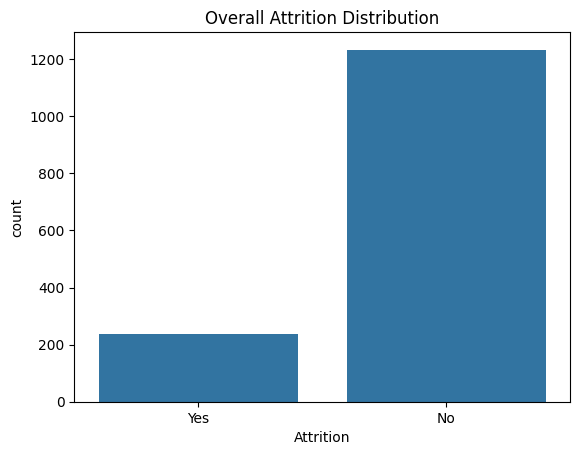

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Attrition count
sns.countplot(data=df, x='Attrition')
plt.title('Overall Attrition Distribution')
plt.show()








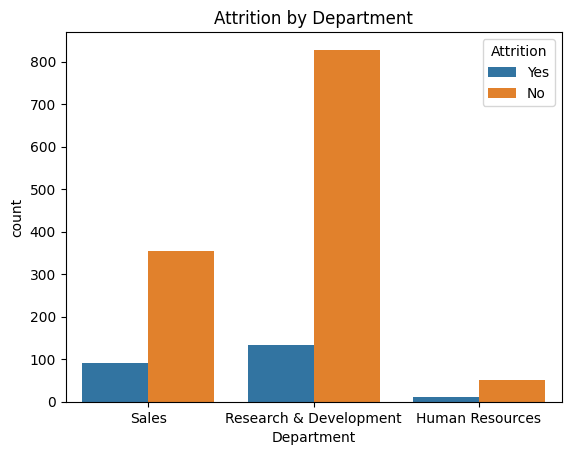

In [6]:
# Department vs Attrition
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title('Attrition by Department')
plt.show()

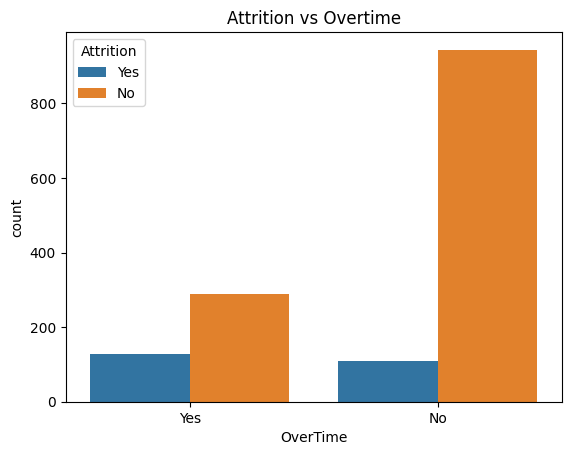

In [7]:
# Overtime vs Attrition
sns.countplot(data=df, x='OverTime', hue='Attrition')
plt.title('Attrition vs Overtime')
plt.show()

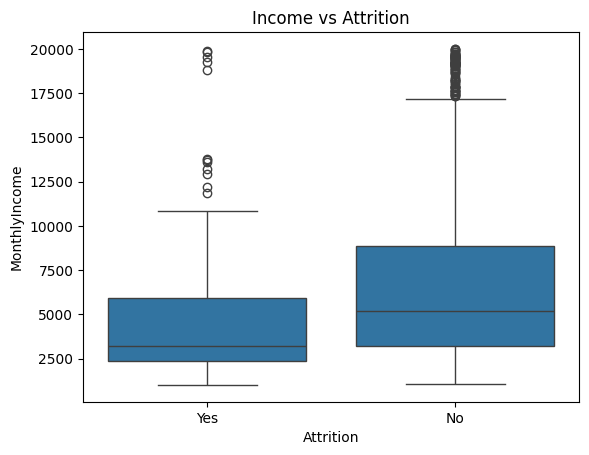

In [8]:
# MonthlyIncome distribution
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')
plt.title('Income vs Attrition')
plt.show()

<h5 style=" font-weight: bold;color:brown;">3. Data Preprocessing</h5>

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Drop irrelevant columns
df_model = df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'])

# Encode categorical columns
le = LabelEncoder()
for col in df_model.columns:
    if df_model[col].dtype == 'object':
        df_model[col] = le.fit_transform(df_model[col])

# Define features and label
X = df_model.drop('Attrition', axis=1)
y = df_model['Attrition']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (1176, 30)
X_test shape: (294, 30)
y_train shape: (1176,)
y_test shape: (294,)


<h5 style=" font-weight: bold;color:brown;">4. Model: Logistic Regression & Decision Tree</h5>

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

# Decision Tree
tree_model = DecisionTreeClassifier(max_depth=5)
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_preds))
print("Decision Tree Accuracy:", accuracy_score(y_test, tree_preds))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, tree_preds))
print("\nClassification Report:\n", classification_report(y_test, tree_preds))


Logistic Regression Accuracy: 0.8707482993197279
Decision Tree Accuracy: 0.826530612244898

Confusion Matrix:
 [[237  18]
 [ 33   6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       255
           1       0.25      0.15      0.19        39

    accuracy                           0.83       294
   macro avg       0.56      0.54      0.55       294
weighted avg       0.79      0.83      0.81       294



C:\Users\PRINCE KUMAR\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<h5 style=" font-weight: bold;color:brown;">5. SHAP – Explain Model Predictions</h5>

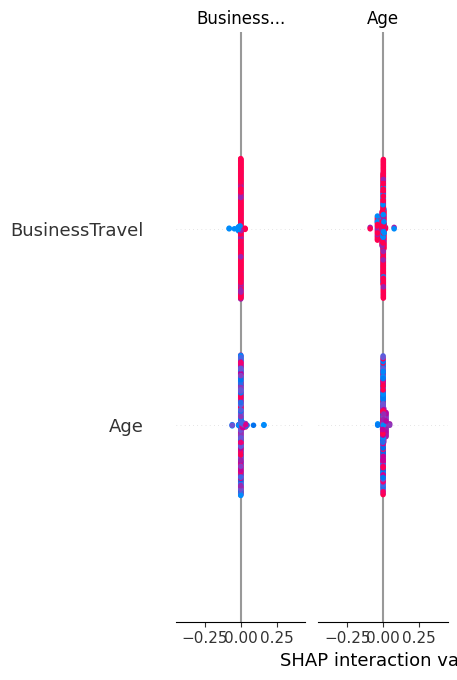

In [13]:
import shap

# Initialize SHAP
explainer = shap.Explainer(tree_model, X_train)
shap_values = explainer(X_test)

# Summary Plot
shap.summary_plot(shap_values, X_test)


<h5 style=" font-weight: bold;color:brown;">6. Random Forest Classifier</h5>
<p>A powerful ensemble model that gives higher accuracy and better feature importance.</p>

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))



Random Forest Accuracy: 0.8809523809523809
Confusion Matrix:
 [[254   1]
 [ 34   5]]


<h5 style=" font-weight: bold;color:brown;"> 7. ROC Curve & AUC Score</h5>
<p>To evaluate how well the model distinguishes between Yes/No attrition.</p>

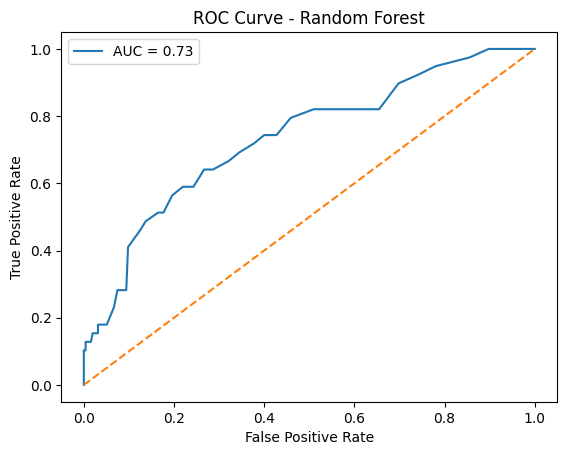

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_prob):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()


<h5 style=" font-weight: bold;color:brown;">7. Top 10 Most Important Features</h5>

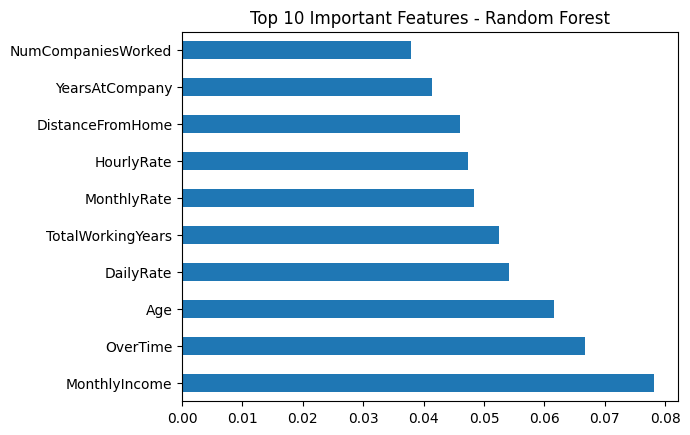

In [16]:
importances = rf_model.feature_importances_
features = pd.Series(importances, index=X.columns)
features.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features - Random Forest')
plt.show()


<h5 style=" font-weight: bold;color:brown;">8. Hyperparameter Tuning (Optional Boost)</h5>
<p>Use GridSearchCV to improve model performance.</p>

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10, 15],
    'n_estimators': [100, 200],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.858843537414966


<h5 style=" font-weight: bold;color:brown;">10. Predict Attrition for New Employees</h5>
<p>Create a form-like input to predict whether a new employee will leave.</p>

In [19]:
new_employee = X_test.iloc[[0]]  # example
prediction = rf_model.predict(new_employee)
print("Will this employee leave?", "Yes" if prediction[0] == 1 else "No")


Will this employee leave? No
